In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
df = pd.read_csv("klapeye-global-terrorism.csv")
df.head()

,DATE,COUNTRY,STATE,CITY,SUBREGION,REGION,PERPETRATOR,INJURED,DEAD,DESCRIPTION,COORDINATES,CATEGORY
0,2022-07-16,Indonesia,Papua,NaN,South-Eastern Asia,Asia,West Papua National Liberation Army,2.0,10.0,Around 20 gunmen attacked the village of Nogol...,"-4.318185048526521, 138.18016262274278",Assault
1,2022-06-28,India,Rajasthan,Udaipur,Southern Asia,Asia,Islamists,NaN,1.0,A Hindu tailor was murdered by two Muslim assa...,"24.612639887486125, 73.69126308833513",Assault
2,2022-06-25,Norway,NaN,Oslo,Northern Europe,Europe,NaN,10.0,2.0,"Two people were killed and 21 injured, 10 of t...","59.913751261491804, 10.75215147566024",Assault
3,2022-06-18,Mali,NaN,NaN,Western Africa,Africa,Macina Liberation Front,NaN,132.0,Unidentified gunmen killed 132 civilians in Di...,"16.3700359,-2.2900239",Assault
4,2022-05-05,Israel,NaN,NaN,Western Asia,Asia,As'ad Alrafa'ani and Sabhi Shajir,4.0,3.0,"In Central Israel, two Palestinian men attacke...","31.5313113,34.8667654",Assault


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27159 entries, 0 to 27158
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         27159 non-null  object 
 1   COUNTRY      27159 non-null  object 
 2   STATE        15404 non-null  object 
 3   CITY         13128 non-null  object 
 4   SUBREGION    21164 non-null  object 
 5   REGION       21159 non-null  object 
 6   PERPETRATOR  10137 non-null  object 
 7   INJURED      27153 non-null  float64
 8   DEAD         27158 non-null  float64
 9   DESCRIPTION  27159 non-null  object 
 10  COORDINATES  27151 non-null  object 
 11  CATEGORY     21563 non-null  object 
dtypes: float64(2), object(10)
memory usage: 2.5+ MB


In [4]:
df.isna().sum()

DATE               0
COUNTRY            0
STATE          11755
CITY           14031
SUBREGION       5995
REGION          6000
PERPETRATOR    17022
INJURED            6
DEAD               1
DESCRIPTION        0
COORDINATES        8
CATEGORY        5596
dtype: int64

In [5]:
df.shape

(27159, 12)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(27159, 12)

In [8]:
df.dtypes

DATE            object
COUNTRY         object
STATE           object
CITY            object
SUBREGION       object
REGION          object
PERPETRATOR     object
INJURED        float64
DEAD           float64
DESCRIPTION     object
COORDINATES     object
CATEGORY        object
dtype: object

In [9]:
df["DATE"] = df["DATE"].astype("datetime64")
df["REGION"] = df["REGION"].astype("category")
df["CATEGORY"] = df["CATEGORY"].astype("category")
df.dtypes

DATE           datetime64[ns]
COUNTRY                object
STATE                  object
CITY                   object
SUBREGION              object
REGION               category
PERPETRATOR            object
INJURED               float64
DEAD                  float64
DESCRIPTION            object
COORDINATES            object
CATEGORY             category
dtype: object

In [10]:
df.set_index("DATE" , inplace=True ) # we can also add drop=False parameter.
df.head()

,COUNTRY,STATE,CITY,SUBREGION,REGION,PERPETRATOR,INJURED,DEAD,DESCRIPTION,COORDINATES,CATEGORY
DATE,,,,,,,,,,,
2022-07-16,Indonesia,Papua,NaN,South-Eastern Asia,Asia,West Papua National Liberation Army,2.0,10.0,Around 20 gunmen attacked the village of Nogol...,"-4.318185048526521, 138.18016262274278",Assault
2022-06-28,India,Rajasthan,Udaipur,Southern Asia,Asia,Islamists,NaN,1.0,A Hindu tailor was murdered by two Muslim assa...,"24.612639887486125, 73.69126308833513",Assault
2022-06-25,Norway,NaN,Oslo,Northern Europe,Europe,NaN,10.0,2.0,"Two people were killed and 21 injured, 10 of t...","59.913751261491804, 10.75215147566024",Assault
2022-06-18,Mali,NaN,NaN,Western Africa,Africa,Macina Liberation Front,NaN,132.0,Unidentified gunmen killed 132 civilians in Di...,"16.3700359,-2.2900239",Assault
2022-05-05,Israel,NaN,NaN,Western Asia,Asia,As'ad Alrafa'ani and Sabhi Shajir,4.0,3.0,"In Central Israel, two Palestinian men attacke...","31.5313113,34.8667654",Assault


In [11]:
# df[((df["STATE"] == "Washington") & (df.CITY.isna()))] # it was training.

In [12]:
df.loc[((df["STATE"] == "Washington") & (df.CITY.isna())) , "STATE"] = "Washington DC" # This works...

In [13]:
df

,COUNTRY,STATE,CITY,SUBREGION,REGION,PERPETRATOR,INJURED,DEAD,DESCRIPTION,COORDINATES,CATEGORY
DATE,,,,,,,,,,,
2022-07-16,Indonesia,Papua,NaN,South-Eastern Asia,Asia,West Papua National Liberation Army,2.0,10.0,Around 20 gunmen attacked the village of Nogol...,"-4.318185048526521, 138.18016262274278",Assault
2022-06-28,India,Rajasthan,Udaipur,Southern Asia,Asia,Islamists,NaN,1.0,A Hindu tailor was murdered by two Muslim assa...,"24.612639887486125, 73.69126308833513",Assault
2022-06-25,Norway,NaN,Oslo,Northern Europe,Europe,NaN,10.0,2.0,"Two people were killed and 21 injured, 10 of t...","59.913751261491804, 10.75215147566024",Assault
2022-06-18,Mali,NaN,NaN,Western Africa,Africa,Macina Liberation Front,NaN,132.0,Unidentified gunmen killed 132 civilians in Di...,"16.3700359,-2.2900239",Assault
2022-05-05,Israel,NaN,NaN,Western Asia,Asia,As'ad Alrafa'ani and Sabhi Shajir,4.0,3.0,"In Central Israel, two Palestinian men attacke...","31.5313113,34.8667654",Assault
...,...,...,...,...,...,...,...,...,...,...,...
1968-02-21,United States,Washington DC,NaN,Northern America,Americas,NaN,0.0,0.0,The Soviet embassy was bombed in the early mor...,"38.8950368,-77.0365427",Explosion
1968-02-20,Chile,Región Metropolitana de Santiago,Santiago,South America,Americas,NaN,0.0,0.0,An explosion from a single stick of dynamite w...,"-33.4377756,-70.6504502",Explosion
1968-02-13,Uruguay,NaN,NaN,South America,NaN,NaN,0.0,0.0,A Molotov cocktail was thrown outside the U.S....,"-32.8755548,-56.0201525",NaN


In [14]:
df[df["STATE"] == "Washington DC"]

,COUNTRY,STATE,CITY,SUBREGION,REGION,PERPETRATOR,INJURED,DEAD,DESCRIPTION,COORDINATES,CATEGORY
DATE,,,,,,,,,,,
2004-02-02,United States,Washington DC,NaN,Northern America,Americas,NaN,0.0,0.0,"A white powdery substance, which tested positi...","38.8950368,-77.0365427",NaN
2003-11-12,United States,Washington DC,NaN,Northern America,Americas,NaN,0.0,0.0,"A letter, laced with ricin, was intercepted in...","38.8950368,-77.0365427",NaN
2001-10-26,United States,Washington DC,NaN,Northern America,Americas,NaN,0.0,0.0,Spores of anthrax were found in the air filter...,"38.8950368,-77.0365427",NaN
2001-10-15,United States,Washington DC,NaN,Northern America,Americas,NaN,31.0,2.0,A letter containing spores of anthrax was foun...,"38.8950368,-77.0365427",NaN
2001-09-11,United States,Washington DC,NaN,Northern America,Americas,Al Qaeda,76.0,189.0,An hour after the attacks against the World Tr...,"38.8950368,-77.0365427",NaN
1985-06-20,United States,Washington DC,NaN,Northern America,Americas,NaN,0.0,0.0,An incendiary device was thrown into the recep...,"38.8950368,-77.0365427",NaN
1984-04-20,United States,Washington DC,NaN,Northern America,Americas,NaN,0.0,0.0,A terrorist group protesting U.S. policy in Ce...,"38.8950368,-77.0365427",Explosion
1983-11-07,United States,Washington DC,NaN,Northern America,Americas,May 19th Communist Organization,0.0,0.0,"The ""Resistance Conspiracy"" faction of the May...","38.8950368,-77.0365427",Explosion
1983-08-27,United States,Washington DC,NaN,Northern America,Americas,NaN,0.0,0.0,The Philippine Embassy in Washington D.C. was ...,"38.8950368,-77.0365427",NaN


In [15]:
df[df["STATE"] == "Washington"]

,COUNTRY,STATE,CITY,SUBREGION,REGION,PERPETRATOR,INJURED,DEAD,DESCRIPTION,COORDINATES,CATEGORY
DATE,,,,,,,,,,,
2009-09-04,United States,Washington,Snohomish,Northern America,Americas,Earth Liberation Front (ELF),0.0,0.0,"On September 4, 2009, 2 radio station towers b...","47.9180275,-122.0899646",NaN
2008-03-03,United States,Washington,Seattle,Northern America,Americas,Earth Liberation Front (ELF),0.0,0.0,"On March 3, 2008, 3 luxury homes were set on f...","47.6038321,-122.3300624",NaN
2006-07-28,United States,Washington,Seattle,Northern America,Americas,NaN,5.0,1.0,One woman was killed and 5 other injured when ...,"47.6038321,-122.3300624","Assault,Hostage"
2005-04-13,United States,Washington,Sammamish,Northern America,Americas,Earth Liberation Front (ELF),0.0,0.0,Members of the Earth Liberation Front (ELF) at...,"47.6088445,-122.0423067",NaN
2005-03-03,United States,Washington,Redmond,Northern America,Americas,Earth Liberation Front (ELF),0.0,0.0,The Earth Liberation Front (ELF) is suspected ...,"47.6694141,-122.1238767",Explosion
2004-04-20,United States,Washington,Snohomish,Northern America,Americas,Earth Liberation Front (ELF),0.0,0.0,The Earth Liberation Front (ELF) is suspected ...,"47.9180275,-122.0899646",NaN
2001-06-11,United States,Washington,Tacoma,Northern America,Americas,NaN,0.0,0.0,"A medical clinic in Tacoma, Washington, where ...","47.2495798,-122.4398746",Explosion
1999-11-01,United States,Washington,Seattle,Northern America,Americas,NaN,0.0,0.0,Four Molotov cocktails were thrown into a GAP ...,"47.6038321,-122.3300624",Explosion
1972-06-02,United States,Washington,Seattle,Northern America,Americas,Black Panther Party,0.0,0.0,"Two hijackers, identified as William Holder, 2...","47.6038321,-122.3300624",Hostage


In [16]:
df

,COUNTRY,STATE,CITY,SUBREGION,REGION,PERPETRATOR,INJURED,DEAD,DESCRIPTION,COORDINATES,CATEGORY
DATE,,,,,,,,,,,
2022-07-16,Indonesia,Papua,NaN,South-Eastern Asia,Asia,West Papua National Liberation Army,2.0,10.0,Around 20 gunmen attacked the village of Nogol...,"-4.318185048526521, 138.18016262274278",Assault
2022-06-28,India,Rajasthan,Udaipur,Southern Asia,Asia,Islamists,NaN,1.0,A Hindu tailor was murdered by two Muslim assa...,"24.612639887486125, 73.69126308833513",Assault
2022-06-25,Norway,NaN,Oslo,Northern Europe,Europe,NaN,10.0,2.0,"Two people were killed and 21 injured, 10 of t...","59.913751261491804, 10.75215147566024",Assault
2022-06-18,Mali,NaN,NaN,Western Africa,Africa,Macina Liberation Front,NaN,132.0,Unidentified gunmen killed 132 civilians in Di...,"16.3700359,-2.2900239",Assault
2022-05-05,Israel,NaN,NaN,Western Asia,Asia,As'ad Alrafa'ani and Sabhi Shajir,4.0,3.0,"In Central Israel, two Palestinian men attacke...","31.5313113,34.8667654",Assault
...,...,...,...,...,...,...,...,...,...,...,...
1968-02-21,United States,Washington DC,NaN,Northern America,Americas,NaN,0.0,0.0,The Soviet embassy was bombed in the early mor...,"38.8950368,-77.0365427",Explosion
1968-02-20,Chile,Región Metropolitana de Santiago,Santiago,South America,Americas,NaN,0.0,0.0,An explosion from a single stick of dynamite w...,"-33.4377756,-70.6504502",Explosion
1968-02-13,Uruguay,NaN,NaN,South America,NaN,NaN,0.0,0.0,A Molotov cocktail was thrown outside the U.S....,"-32.8755548,-56.0201525",NaN


In [17]:
#reg_grouped_df = df.groupby("REGION")

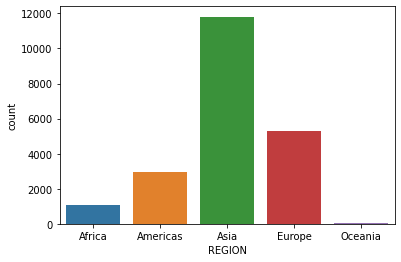

In [18]:
sns.countplot(x = df.REGION);

In [19]:
df.groupby("COUNTRY").sum()

,INJURED,DEAD
COUNTRY,,
Afghanistan,8938.0,6052.0
Albania,20.0,9.0
Algeria,1832.0,1482.0
Angola,301.0,566.0
Argentina,1118.0,271.0
...,...,...
Vietnam,0.0,76.0
Yemen,1234.0,660.0
Zaire,0.0,5.0


C:\Users\EmincanY\AppData\Local\Temp\ipykernel_2712\2346152136.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  sns.barplot(x = df.groupby("COUNTRY").sum()["DEAD"].sort_values(ascending=False).head(10).index , y = df.groupby("COUNTRY").max()["DEAD"].sort_values(ascending=False).head(10).values)


<AxesSubplot:xlabel='COUNTRY'>

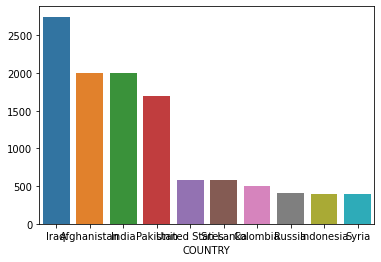

In [20]:
sns.barplot(x = df.groupby("COUNTRY").sum()["DEAD"].sort_values(ascending=False).head(10).index , y = df.groupby("COUNTRY").max()["DEAD"].sort_values(ascending=False).head(10).values)

# Most 10 countries which has more dead

In [21]:
df.dtypes

COUNTRY          object
STATE            object
CITY             object
SUBREGION        object
REGION         category
PERPETRATOR      object
INJURED         float64
DEAD            float64
DESCRIPTION      object
COORDINATES      object
CATEGORY       category
dtype: object

In [22]:
df[df["COUNTRY"] == "Tajikistan"]

,COUNTRY,STATE,CITY,SUBREGION,REGION,PERPETRATOR,INJURED,DEAD,DESCRIPTION,COORDINATES,CATEGORY
DATE,,,,,,,,,,,
2018-07-29,Tajikistan,Khatlon Province,Danghara,Central Asia,Asia,Islamic State,2.0,4.0,"Two Americans, a Swiss and a Dutch national we...","38.0954432,69.3321224",Assault
2008-02-01,Tajikistan,NaN,NaN,Central Asia,Asia,NaN,0.0,0.0,An RGD 5 grenade exploded near a building near...,"38.6281733,70.8156541",Explosion
2007-11-14,Tajikistan,NaN,NaN,Central Asia,Asia,NaN,0.0,1.0,"An explosion occurred in Dushanbe, the capital...","38.6281733,70.8156541",Explosion
2007-06-16,Tajikistan,NaN,NaN,Central Asia,Asia,NaN,0.0,0.0,"The Supreme Court in Dushanbe, the capital of ...","38.6281733,70.8156541",Explosion
2006-06-16,Tajikistan,NaN,NaN,Central Asia,Asia,NaN,0.0,0.0,This is the third report of a series of 3 expl...,"38.6281733,70.8156541",Explosion
2005-06-12,Tajikistan,NaN,NaN,Central Asia,Asia,Islamic Movement of Uzbekistan,12.0,0.0,An explosion occurred in the Tajik capital of ...,"38.6281733,70.8156541",Explosion
2003-09-19,Tajikistan,NaN,NaN,NaN,NaN,NaN,0.0,0.0,A bomb went off at a building housing Jabbor R...,"38.6281733,70.8156541",Explosion
2002-02-19,Tajikistan,NaN,NaN,Central Asia,Asia,NaN,0.0,0.0,A detonator for a bomb went off but it did not...,"38.6281733,70.8156541",Explosion
2001-11-18,Tajikistan,NaN,NaN,NaN,NaN,NaN,1.0,0.0,A deputy chairman of the Islamic Rebirth Party...,"38.6281733,70.8156541",NaN


In [23]:
#df.to_csv("Terrorism.csv")